In [ ]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('List of Countries by Sugarcane Production.csv')
df.head(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27
6,6,Colombia,South America,36.951.213,740075,416.626,"88.691,5"
7,7,Australia,Oceania,34.403.004,"1.373,406",447.204,"76.929,1"
8,8,Guatemala,North America,33.533.403,"1.938,114",259.85,"129.049,3"
9,9,United States of America,North America,29.926.210,91304,370.53,80.766


In [5]:
# number of rows and columns
df.shape

(103, 7)

In [6]:
# columns names 
df.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [8]:
# cleaning the data for ease computaion 
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [9]:
# printing whole dataset
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,283864
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,119498


In [10]:
# renaming the columns (feature engineering)
df.rename(columns = {'Production (Tons)':'Production(Tons)','Production per Person (Kg)':'Production_per_Person(Kg)','Acreage (Hectare)':'Acreage(Hectare)','Yield (Kg / Hectare)':'Yield(Kg / Hectare)'},inplace = True)

In [11]:
# printing modified columns
df.head(6)

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879
5,5,Mexico,North America,56446821,452524,781054,7227


In [13]:
# checking the types of the data in each column
df.dtypes

Unnamed: 0                    int64
Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg / Hectare)          object
dtype: object

In [14]:
# converting the datatype of the columns for computarional work
df['Production(Tons)'] = df['Production(Tons)'].astype('float')
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype('float')
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype('float')
df['Yield(Kg / Hectare)'] = df['Yield(Kg / Hectare)'].astype('float')

In [15]:
# printing modified datatypes of columns
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
dtype: object

In [16]:
# data cleaning process, printing how many null values in the dataset
df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

In [17]:
# printing the rows conatiaing null values
df[df['Yield(Kg / Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
99,99,Djibouti,Africa,53.0,51.0,NaN,NaN


In [18]:
# since there is only one row having null value, it is dropped
df = df.dropna().reset_index()

In [19]:
df.drop(['index','Unnamed: 0'],axis = 1,inplace = True)

In [20]:
# printing cleaned data set
df.head(10)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,751675.0
1,India,Asia,348448000.0,260721.0,4950000.0,703935.0
2,China,Asia,123059739.0,88287.0,1675215.0,734591.0
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,654422.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0
6,Colombia,South America,36951213.0,740075.0,416626.0,886915.0
7,Australia,Oceania,34403004.0,1373406.0,447204.0,769291.0
8,Guatemala,North America,33533403.0,1938114.0,25985.0,1290493.0
9,United States of America,North America,29926210.0,91304.0,37053.0,80766.0


In [21]:
df.shape

(102, 6)

In [23]:
# printing how many times same continent repeated in the dataset
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [25]:
# assingning it to df_new
df_new = df['Continent'].value_counts()

In [26]:
df_new

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

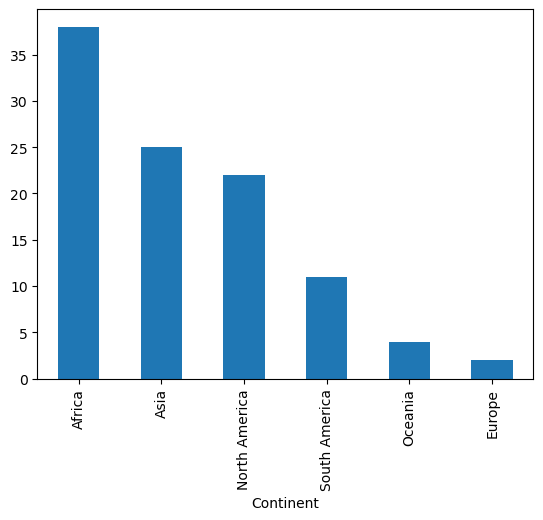

In [27]:
# bar plot to visualize the number of times each continemts appeared in the dataset
df['Continent'].value_counts().plot(kind = 'bar')

C:\Users\Prasanna dindi\AppData\Local\Temp\ipykernel_6272\159357008.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\Prasanna dindi\AppData\Local\Temp\ipykernel_6272\159357008.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person(Kg)'])

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Density'>

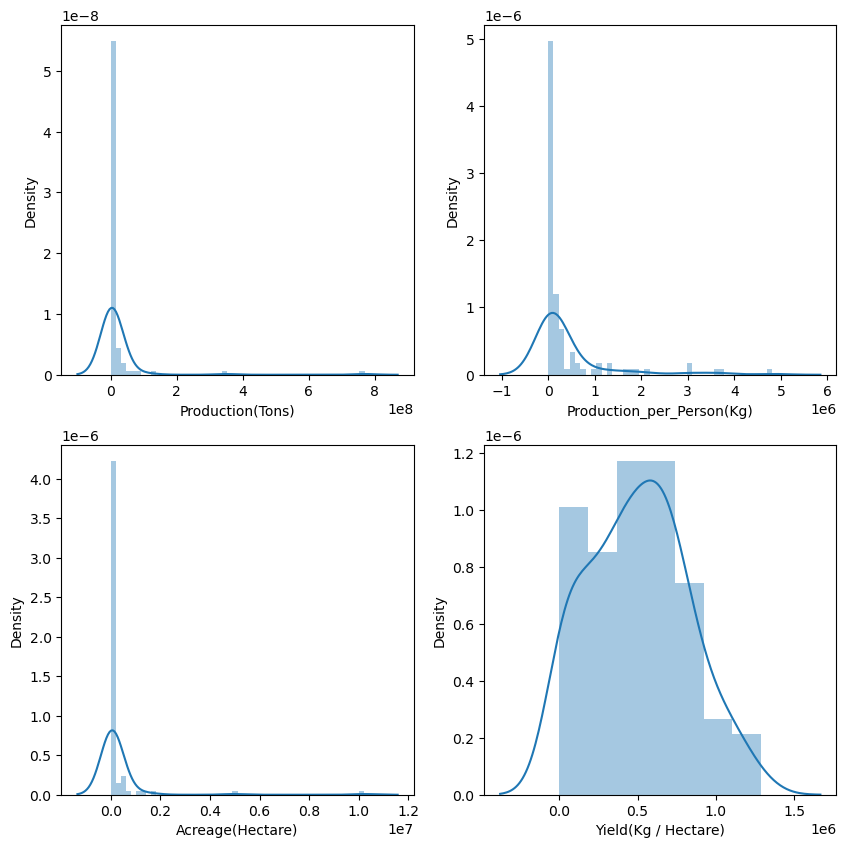

In [30]:
# below code give the distribution plot of each continent in the dataset
ax = plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg / Hectare)'])

<Axes: ylabel='Yield(Kg / Hectare)'>

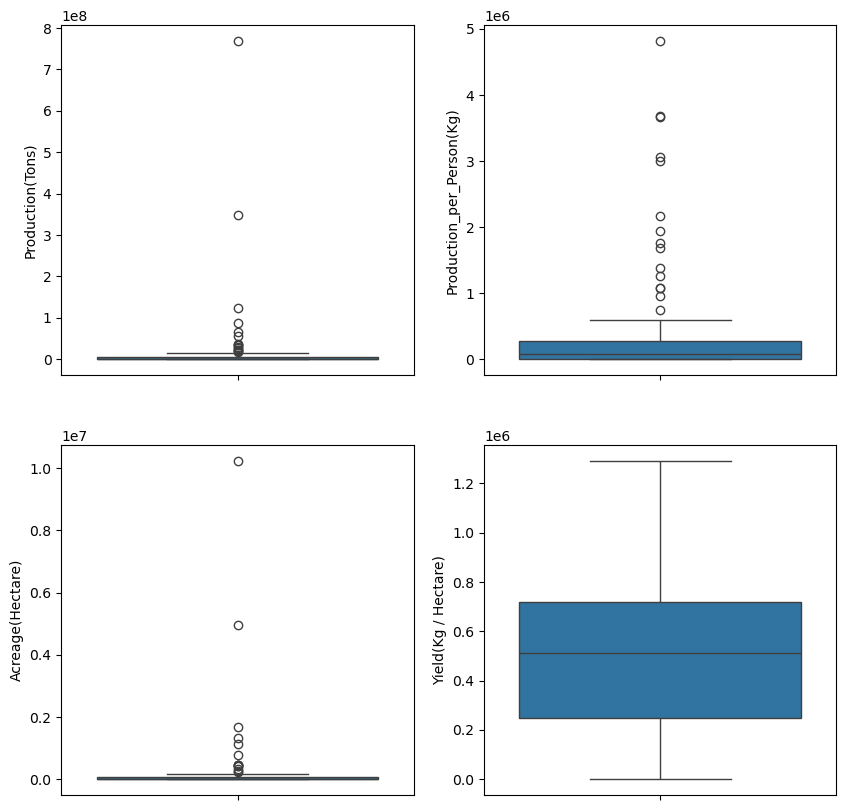

In [32]:
# box plot give the outliers in the dataset
ax = plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg / Hectare)'])

In [33]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

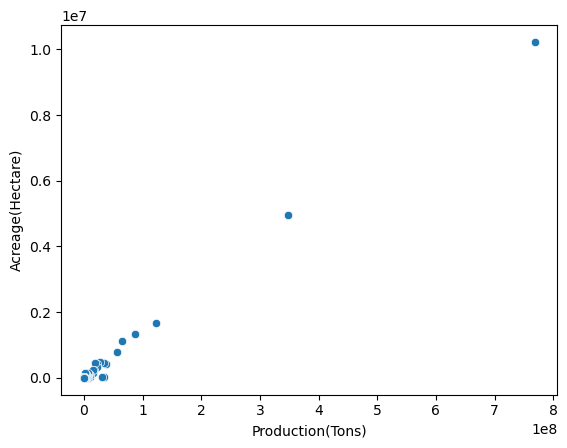

In [41]:
# to check the paramter dependency
sns.scatterplot(data = df,x = 'Production(Tons)',y = 'Acreage(Hectare)')

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

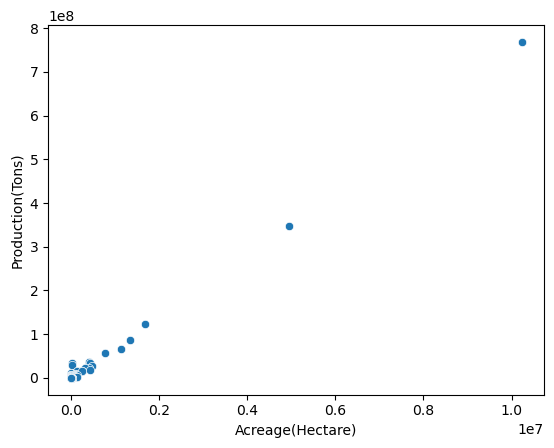

In [43]:
sns.scatterplot(data = df,x = 'Acreage(Hectare)',y = 'Production(Tons)')

In [44]:
df_new

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [45]:
df_new = df[['Country','Production(Tons)']].set_index('Country')

In [46]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


<Axes: xlabel='Country'>

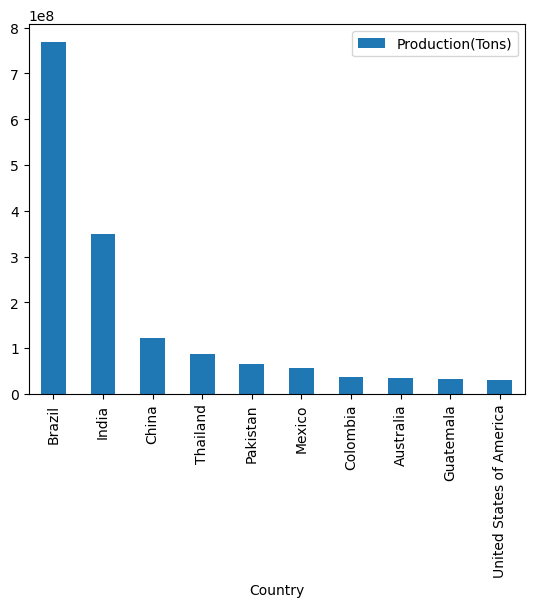

In [47]:
df_new.head(10).plot(kind = 'bar')

In [48]:
df_new['percentage'] = df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [49]:
df_new

,Production(Tons),percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='percentage'>

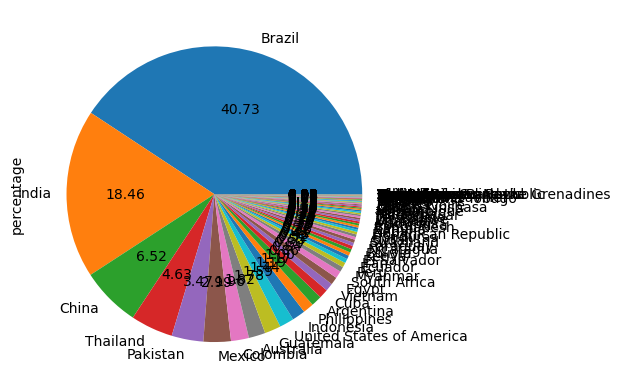

In [50]:
df_new['percentage'].plot(kind = 'pie',autopct = '%.2f')

<Axes: ylabel='Production(Tons)'>

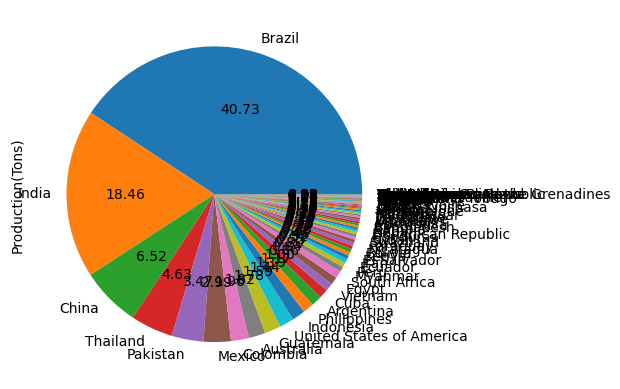

In [51]:
df_new['Production(Tons)'].plot(kind = 'pie',autopct = '%.2f')

In [52]:
sns.heatmap(df.corr(),annot = True,cmap = 'Greens')

ValueError: could not convert string to float: 'Brazil'

In [53]:
df_acr = df['Acreage(Hectare)'].sort_values(ascending = False)

<Axes: >

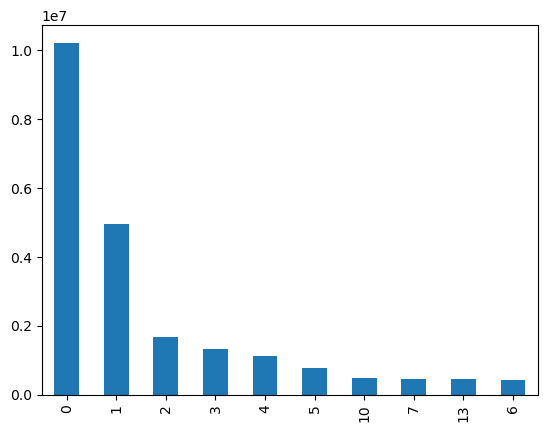

In [54]:
df_acr.head(10).plot(kind = 'bar')

C:\Users\Prasanna dindi\AppData\Local\Temp\ipykernel_6272\3970358501.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


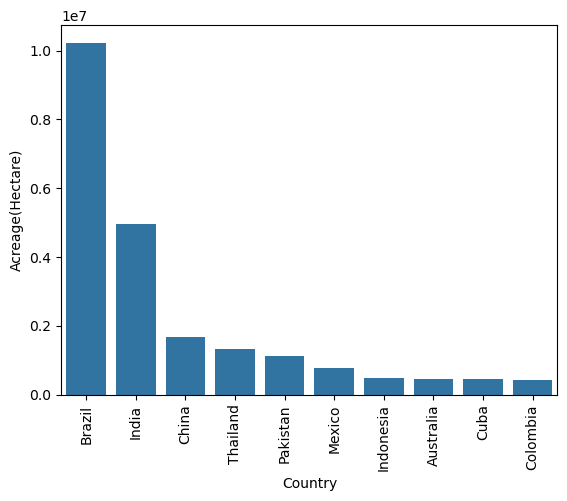

In [55]:
df_acr = df.sort_values('Acreage(Hectare)',ascending = False).head(10)
ax = sns.barplot(data = df_acr,x = 'Country',y = 'Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

C:\Users\Prasanna dindi\AppData\Local\Temp\ipykernel_6272\2902679279.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


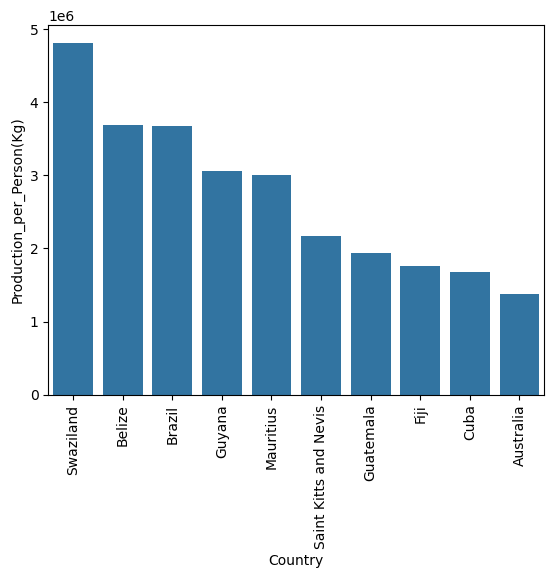

In [56]:
df_kg = df.sort_values('Production_per_Person(Kg)',ascending = False).head(10)
ax = sns.barplot(data = df_kg,x = 'Country',y = 'Production_per_Person(Kg)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [57]:
df_continent = df.groupby('Continent').sum()

In [58]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,20700454.0
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,11197308.0
Europe,PortugalSpain,5823.0,536.0,71.0,1318709.0
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,9581162.0
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,1624191.0
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,6766896.0


<Axes: xlabel='Continent'>

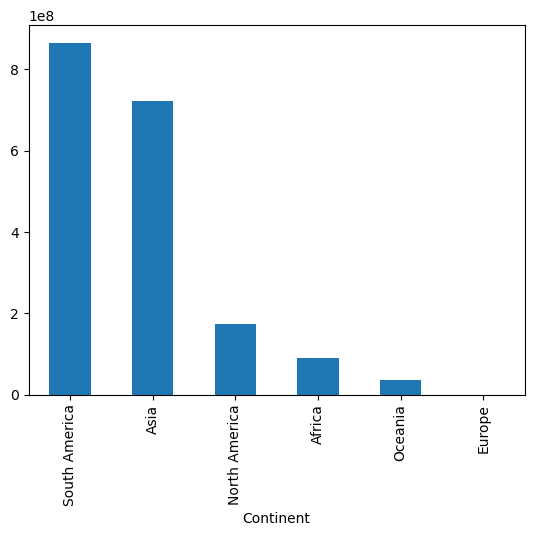

In [59]:
df_continent['Production(Tons)'].sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='Continent'>

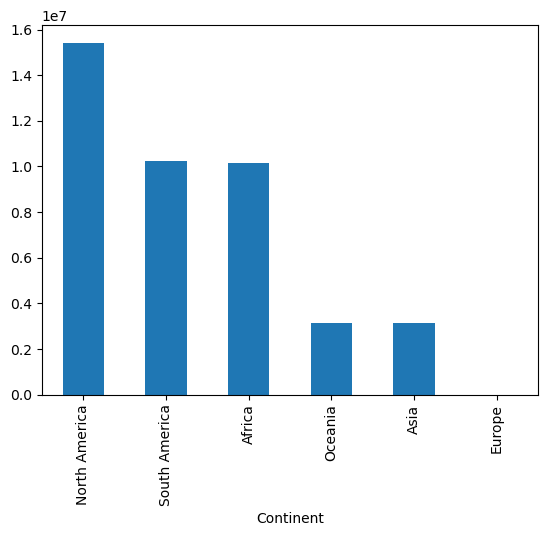

In [60]:
df_continent['Production_per_Person(Kg)'].sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='Continent'>

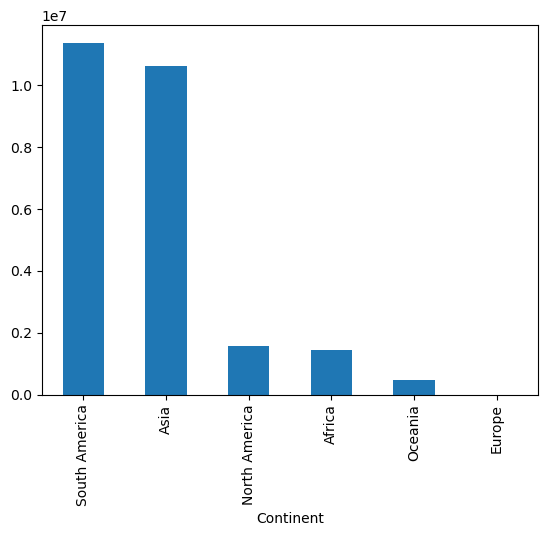

In [61]:
df_continent['Acreage(Hectare)'].sort_values(ascending = False).plot(kind = 'bar')